In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from pprint import pprint

def get_image_array(image_path):
    
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED) 
    
    
    return image

def get_max_min(image_path):
    arr=get_image_array(image_path)
    ma=np.max(arr)
    mi=np.min(arr)
    return mi,ma

import os

def get_immediate_subfolders(path):
    try:
        return [f.path for f in os.scandir(path) if f.is_dir()]
    except FileNotFoundError:
        print(f"Path not found: {path}")
        return []
    except PermissionError:
        print(f"Permission denied: {path}")
        return []

In [2]:
main_path='/mnt/Velocity_Vault/Autofocus/Train/'
left_paths=[]

for tr in range(7):
    temp_path=get_immediate_subfolders(main_path+'train'+str(tr+1)+'/raw_up_left_pd')
    for temp in temp_path:
        for foc in range(49):
            path=temp+'/'+str(foc)+'/result_up_pd_left_center.png'  
            left_paths.append(path)
            
#pprint(left_paths)

In [3]:
max_values=[]
min_values=[]

for path in tqdm(left_paths):
    mi,ma=get_max_min(path)
    max_values.append(ma)
    min_values.append(mi)
    
max_values=np.array(max_values)
min_values=np.array(min_values)

pprint(np.max(max_values))
pprint(np.min(min_values))

100%|██████████| 17395/17395 [15:08<00:00, 19.15it/s]

16368
452


7.65625


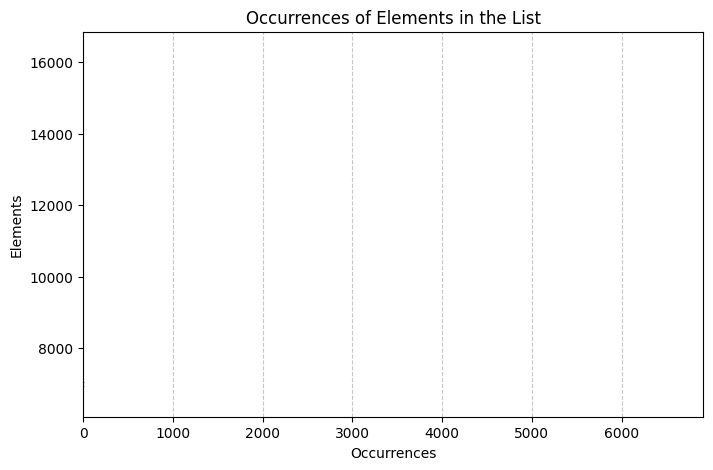

74.02127659574468


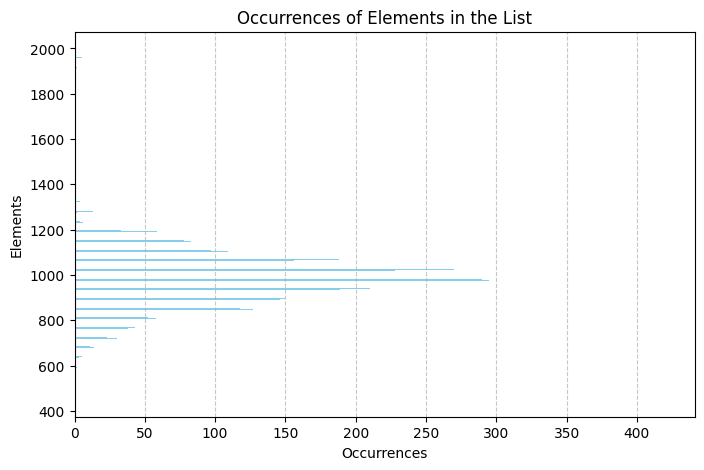

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_occurrences(numbers):
    # Count occurrences of each element
    occurrences = Counter(numbers)
    

    # Extract keys (unique numbers) and their corresponding values (counts)
    elements = list(occurrences.keys())
    counts = list(occurrences.values())
    print(np.mean(counts))

    # Plot a horizontal bar graph
    plt.figure(figsize=(8, 5))
    plt.barh(elements, counts, color="skyblue")
    plt.xlabel("Occurrences")
    plt.ylabel("Elements")
    plt.title("Occurrences of Elements in the List")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
    
plot_occurrences(max_values)
plot_occurrences(min_values)

    